In [52]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

import scipy
import pywt
import mne

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
import glob
import os


#import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

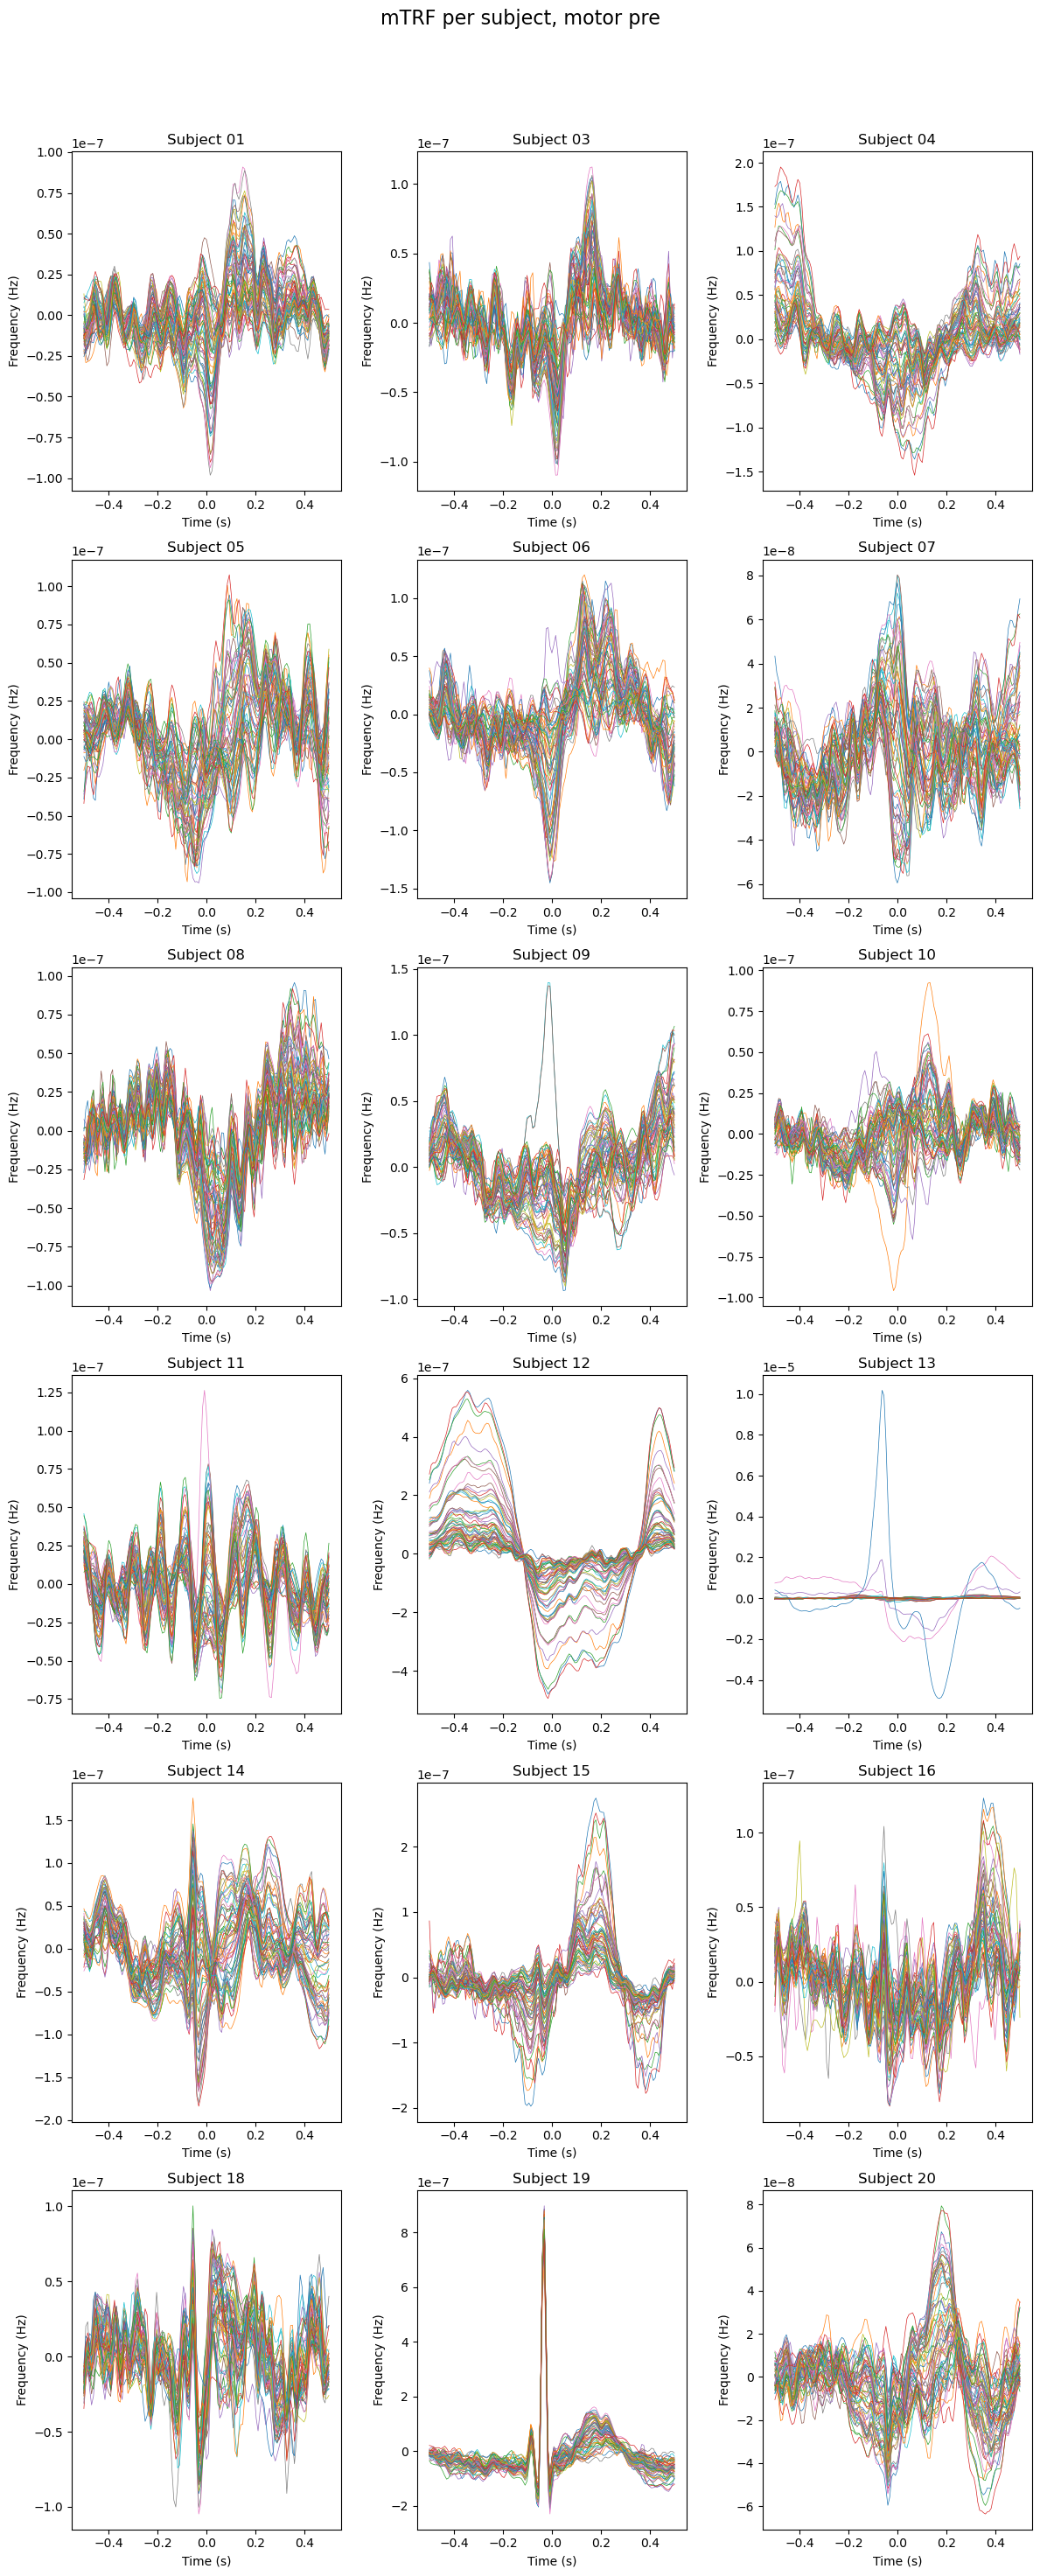

In [53]:
task = 'motor'
period = 'pre'

good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()

#subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
subjects = good_motor_subjects

mtrf_path = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_mTRF_data_30Hz'

erp_times = create_erp_times(-0.5,0.5, 128)

# Define grid layout for subplots
num_columns = 3  # Adjust the number of columns as needed
num_rows = math.ceil(len(subjects) / num_columns)

# Create a figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten to make indexing easier
fig.suptitle(f'mTRF per subject, {task} {period}', fontsize=16)

for i, sub in enumerate(subjects):
    # Load wavelet data
    mtrf_weights = loadmat(os.path.join(mtrf_path, f'mTRFweights_{task}_{period}_{sub}.mat'))['weights'][0]

    # Plot on the respective subplot
    ax = axes[i]
    ax.plot(erp_times, mtrf_weights, linewidth = 0.5)
    ax.set_title(f'Subject {sub}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

# Turn off unused subplots
for j in range(len(subjects), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [54]:
load_ep_info()

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 6 misc, 2 EOG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 72
 projs: []
 sfreq: 128.0 Hz
>

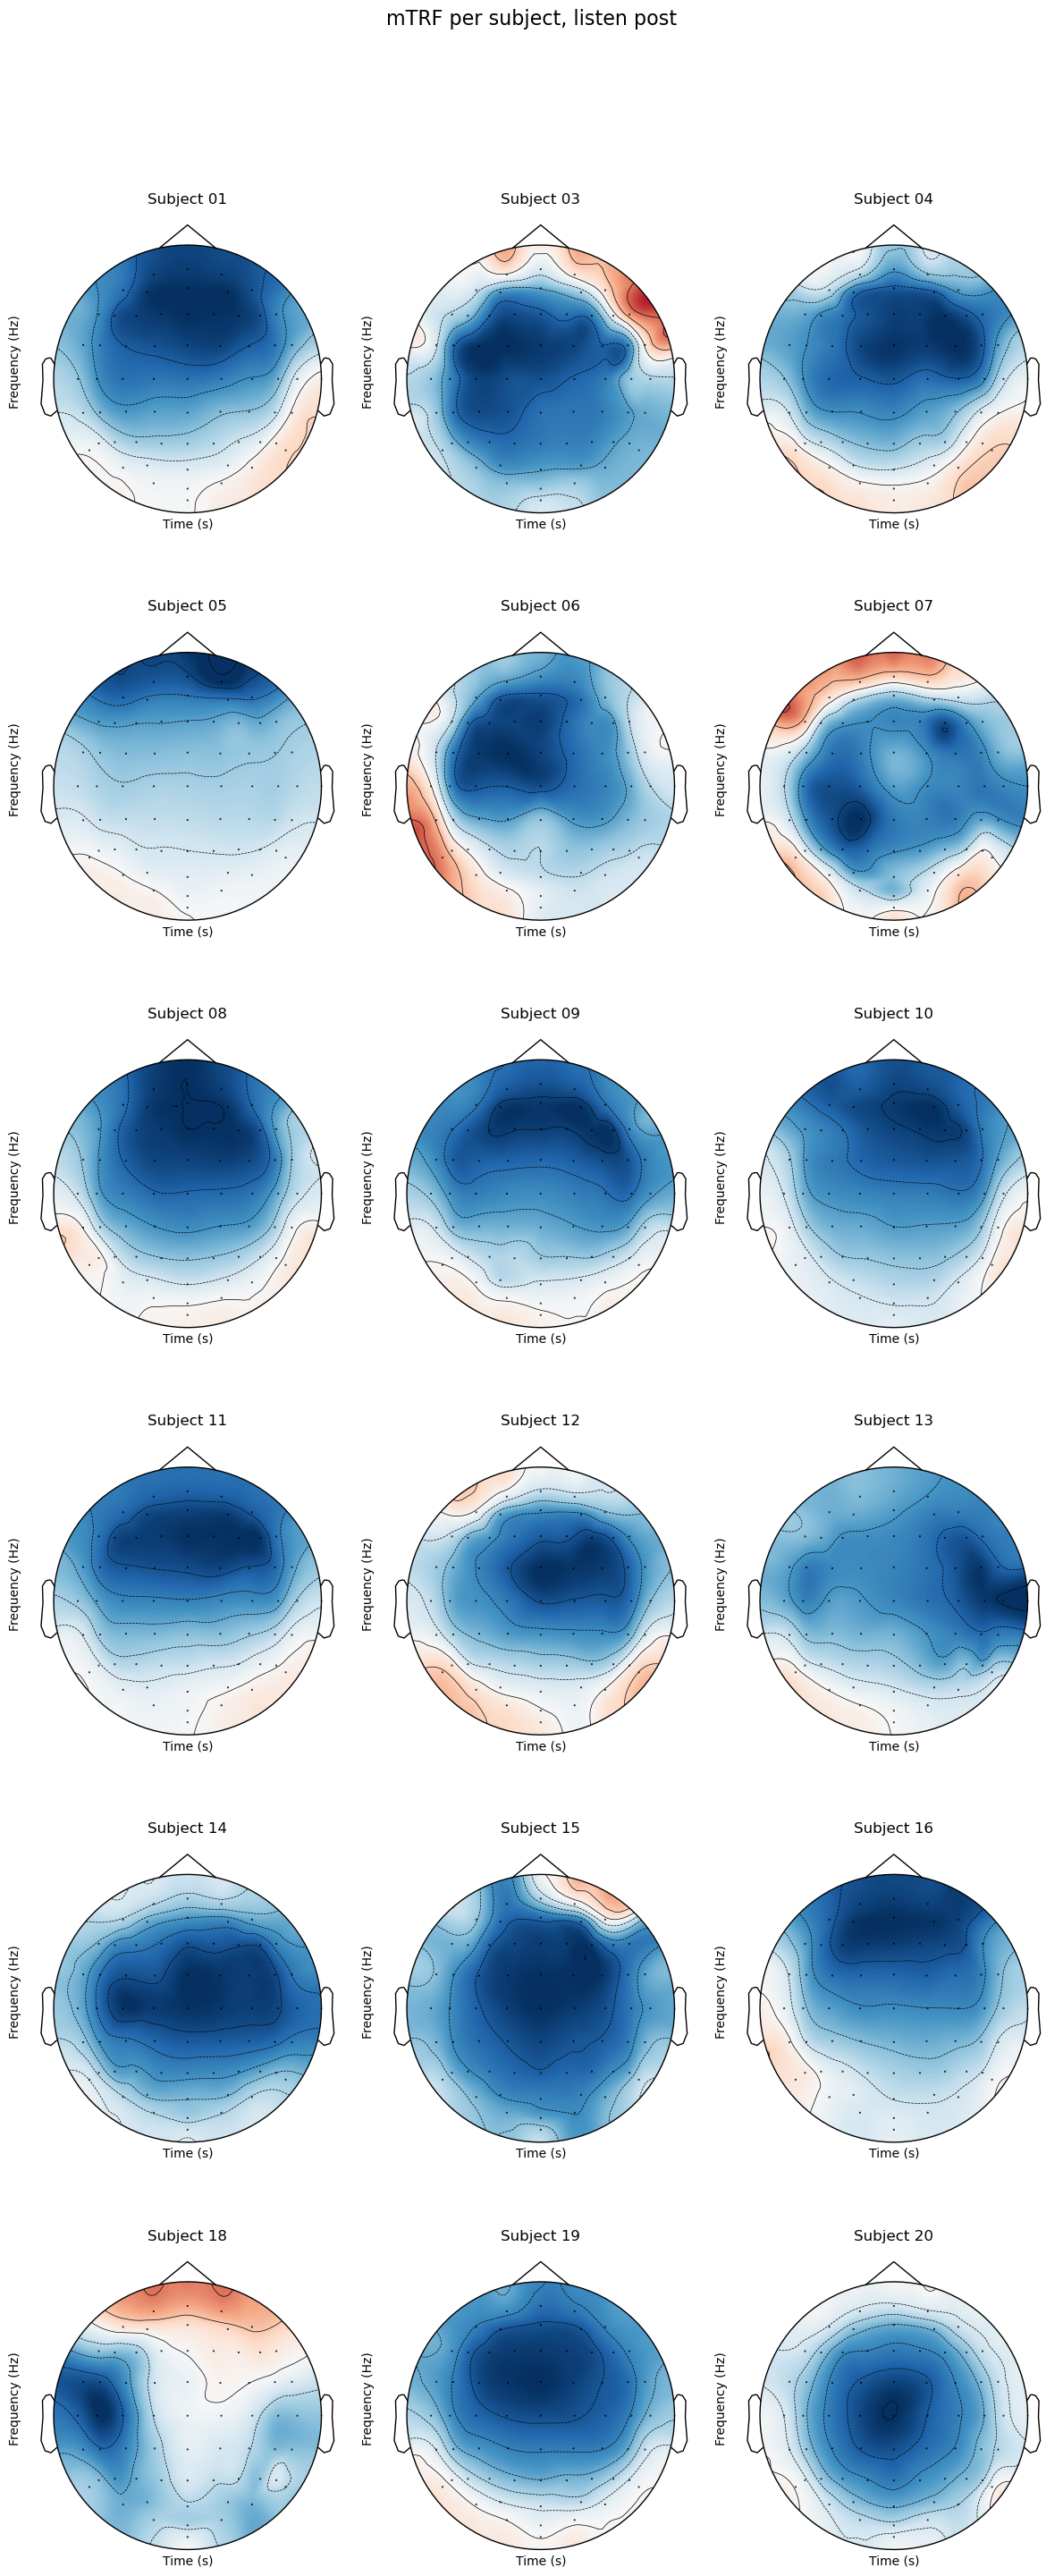

In [55]:
task = 'listen'
period = 'post'
time_idx = 79

good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()

#subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
subjects = good_motor_subjects

mtrf_path = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_mTRF_data_30Hz'

erp_times = create_erp_times(-0.5,0.5, 128)
pos = load_ep_info()

# Define grid layout for subplots
num_columns = 3  # Adjust the number of columns as needed
num_rows = math.ceil(len(subjects) / num_columns)

# Create a figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten to make indexing easier
fig.suptitle(f'mTRF per subject, {task} {period}', fontsize=16)

for i, sub in enumerate(subjects):
    # Load wavelet data
    mtrf_weights_time = loadmat(os.path.join(mtrf_path, f'mTRFweights_{task}_{period}_{sub}.mat'))['weights'][0][time_idx]
    

    # Plot on the respective subplot
    ax = axes[i]
    #ax.plot(erp_times, mtrf_weights, linewidth = 0.5)
    mne.viz.plot_topomap(mtrf_weights_time, pos, axes = ax, show = False)
    ax.set_title(f'Subject {sub}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

# Turn off unused subplots
for j in range(len(subjects), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'mTRF_topo_{task}_{period}.png')
plt.show()

In [56]:
mtrf_weights_time

array([-3.61869832e-08, -3.29815311e-08, -7.65517362e-08, -1.20496460e-07,
       -1.14696178e-07, -7.24236685e-08, -4.16768269e-08, -5.11492912e-08,
       -7.58995846e-08, -1.26171473e-07, -1.53330512e-07, -1.63054356e-07,
       -1.27427080e-07, -8.03008856e-08, -3.04945028e-08, -2.95687721e-08,
       -7.41652702e-08, -1.21478581e-07, -1.52348353e-07, -1.18248633e-07,
       -1.03358975e-07, -7.08013985e-08, -2.49392442e-08, -2.07165224e-09,
       -4.00686426e-08, -7.71599910e-08, -4.96125076e-08, -2.16219398e-08,
       -5.10631926e-08, -9.25343573e-08, -1.32238570e-07, -1.58318968e-07,
       -3.54825343e-08, -3.28778752e-08, -4.28325559e-08, -8.55694199e-08,
       -9.14609483e-08, -1.28255302e-07, -1.23651991e-07, -1.10372227e-07,
       -7.62809973e-08, -4.28480077e-08, -4.27851384e-08, -8.18676521e-08,
       -1.19605863e-07, -1.54173472e-07, -1.66520815e-07, -1.80491327e-07,
       -1.49175276e-07, -1.22986935e-07, -8.89690204e-08, -4.08174916e-08,
       -5.42544209e-08, -

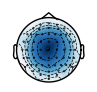

(<matplotlib.image.AxesImage at 0x1346f8190>,
 <matplotlib.contour.QuadContourSet at 0x1255dda50>)

In [57]:

mne.viz.plot_topomap(mtrf_weights_time, pos)